In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
# from skimage.draw import circle
from numpy.fft import fft2,ifft2,fftshift,ifftshift
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random


In [4]:
from skimage.draw import disk
def Circ(r, L): #circle
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    x, y = disk(center, r)
    aperture[x, y] = 1
    return aperture


In [16]:
def Rec(w,h, L): #rectangle
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    for i in np.arange(center[0]-w//2,center[0]+w//2): #width
        for j in np.arange(center[1]-h//2,center[1]+h//2) : #height
            aperture[int(i)][int(j)] = 1
    return aperture

In [17]:
def Slit(d,h,w, L): #doubleslit
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    x = (center[0]-d/2,center[0]+d/2)
    for i1 in np.arange(x[0]-w,x[0]):
        for i2 in np.arange(x[1], x[1]+w):
            for j in np.arange(center[1]-h//2,center[1]+h//2):
                aperture[int(j)][int(i1)] = 1
                aperture[int(j)][int(i2)] = 1
    return aperture

def triangle(height, L):
    aperture = np.zeros(shape = (L,L), dtype = float)
    tip = (int(L/3),int(L/2))
#     height = 20
    for i in np.arange(0, height):
        aperture[tip[0], tip[1]] = 1
        aperture[tip[0]+i, tip[1]-i:tip[1]+i] = 1
    return aperture

In [5]:
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale

In [6]:
image = Circ(50, 128)

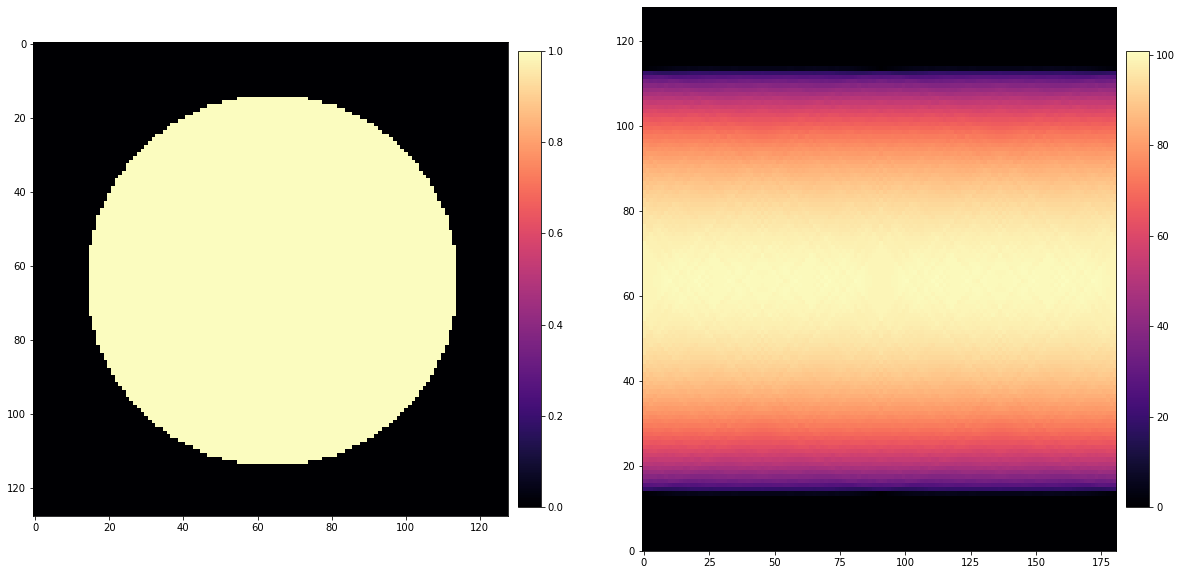

In [11]:
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]

cmap = 'magma'

fig = plt.figure(figsize=(20,10))   
plt.subplot(121)
im = plt.imshow(image, cmap)
cbar = plt.colorbar(im, fraction=0.045, pad=0.02)
plt.subplot(122)
im2 = plt.imshow(sinogram, cmap=cmap,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')
cbar2 = plt.colorbar(im2, fraction=0.045, pad=0.02)

In [19]:
def Radon(image):

    theta = np.linspace(0., 180., max(image.shape), endpoint=False)
    sinogram = radon(image, theta=theta)
    dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]

    cmap = 'magma'

    fig = plt.figure(figsize=(10,5))   
    plt.subplot(121)
    im = plt.imshow(image, cmap)
    cbar = plt.colorbar(im, fraction=0.045, pad=0.02)
    plt.subplot(122)
    im2 = plt.imshow(sinogram, cmap=cmap,
               extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
               aspect='auto')
    cbar2 = plt.colorbar(im2, fraction=0.045, pad=0.02)
    plt.show()

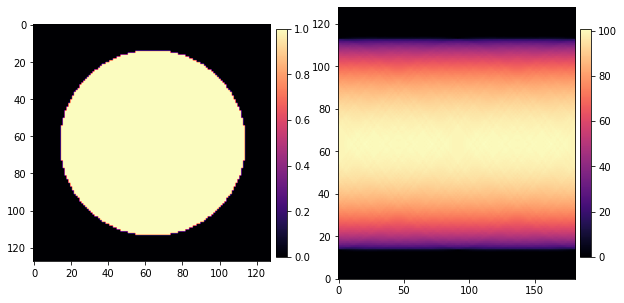

In [20]:
Radon(Circ(50, 128))

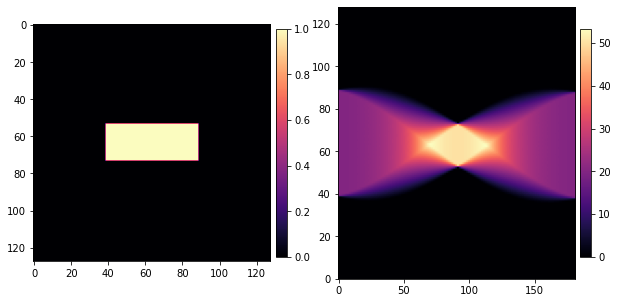

In [21]:
Radon(Rec(20,50,128))

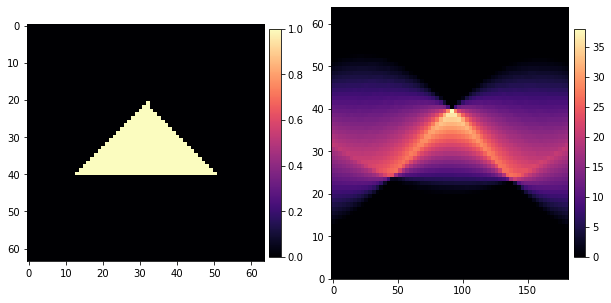

In [22]:
Radon(triangle(20, 64))

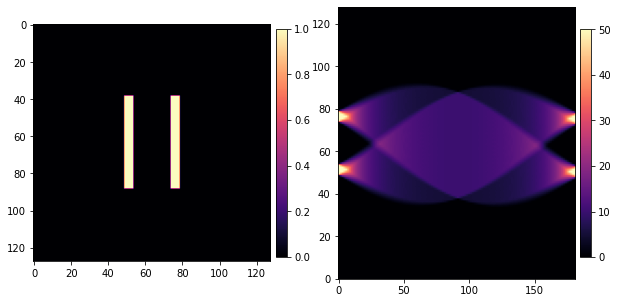

In [25]:
Radon(Slit(20,50,5,128))

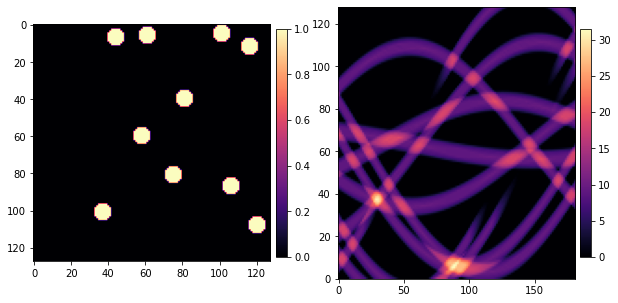

In [41]:
Radon(Rand_Circs(5, 10, 128))

In [40]:
def Rand_Circs(r, num_circles, L):
    aperture = np.zeros(shape = (L,L), dtype = float)
    i = 0
    while i<num_circles:
        center = random.randint(5,L), random.randint(5,L)
        x, y = disk(center, r)
        aperture[x, y] = 1
        i += 1
    return aperture